In [97]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  
password = getpass.getpass()

import numpy as np

········


In [98]:
# Task 1: Create a query or queries to extract the information you think may be relevant for building the prediction model. 
    # It should include some film features and some rental features. Use the data from 2005.
# See SQL

In [99]:
# Task 2: Create a query to get the list of films and a boolean indicating if it was rented last month (May 2005). 
    # This would be our target variable.

In [100]:
# Task 3: Read the data into a Pandas dataframe.

In [101]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''SELECT f.title, f.rental_rate, f.length, f.rating, f.rental_duration, (
SELECT
CASE WHEN rental_date BETWEEN '2005-05-00 00:00:00' AND '2005-06-00 00:00:00' then 1
else 0
end as rented_may) as rentals_may
from sakila.rental r
JOIN inventory i USING (inventory_id)
JOIN film f USING (film_id)
ORDER BY f.title;'''

data = pd.read_sql_query(query, engine)
data.head(50)

,title,rental_rate,length,rating,rental_duration,rentals_may
0,ACADEMY DINOSAUR,0.99,86,PG,6,0
1,ACADEMY DINOSAUR,0.99,86,PG,6,0
2,ACADEMY DINOSAUR,0.99,86,PG,6,0
3,ACADEMY DINOSAUR,0.99,86,PG,6,0
4,ACADEMY DINOSAUR,0.99,86,PG,6,0
5,ACADEMY DINOSAUR,0.99,86,PG,6,0
6,ACADEMY DINOSAUR,0.99,86,PG,6,0
7,ACADEMY DINOSAUR,0.99,86,PG,6,1
8,ACADEMY DINOSAUR,0.99,86,PG,6,0
9,ACADEMY DINOSAUR,0.99,86,PG,6,0


In [102]:
data.shape

(16048, 6)

In [159]:
data_new = data.copy()                                      
data_new['rentals_may'] = data_new['rentals_may'].apply(bool)                 
print(data_new)  

                  title  rental_rate  length rating  rental_duration  \
0      ACADEMY DINOSAUR         0.99      86     PG                6   
1      ACADEMY DINOSAUR         0.99      86     PG                6   
2      ACADEMY DINOSAUR         0.99      86     PG                6   
3      ACADEMY DINOSAUR         0.99      86     PG                6   
4      ACADEMY DINOSAUR         0.99      86     PG                6   
...                 ...          ...     ...    ...              ...   
16043         ZORRO ARK         4.99      50  NC-17                3   
16044         ZORRO ARK         4.99      50  NC-17                3   
16045         ZORRO ARK         4.99      50  NC-17                3   
16046         ZORRO ARK         4.99      50  NC-17                3   
16047         ZORRO ARK         4.99      50  NC-17                3   

       rentals_may  
0            False  
1            False  
2            False  
3            False  
4            False  
...      

In [160]:
data_st = data_new.copy()                                      
data_st['rentals_may'] = data_st['rentals_may'].apply(str)                 
print(data_st)  

                  title  rental_rate  length rating  rental_duration  \
0      ACADEMY DINOSAUR         0.99      86     PG                6   
1      ACADEMY DINOSAUR         0.99      86     PG                6   
2      ACADEMY DINOSAUR         0.99      86     PG                6   
3      ACADEMY DINOSAUR         0.99      86     PG                6   
4      ACADEMY DINOSAUR         0.99      86     PG                6   
...                 ...          ...     ...    ...              ...   
16043         ZORRO ARK         4.99      50  NC-17                3   
16044         ZORRO ARK         4.99      50  NC-17                3   
16045         ZORRO ARK         4.99      50  NC-17                3   
16046         ZORRO ARK         4.99      50  NC-17                3   
16047         ZORRO ARK         4.99      50  NC-17                3   

      rentals_may  
0           False  
1           False  
2           False  
3           False  
4           False  
...           .

In [163]:
data_st.head()


,title,rental_rate,length,rating,rental_duration,rentals_may
0,ACADEMY DINOSAUR,0.99,86,PG,6,False
1,ACADEMY DINOSAUR,0.99,86,PG,6,False
2,ACADEMY DINOSAUR,0.99,86,PG,6,False
3,ACADEMY DINOSAUR,0.99,86,PG,6,False
4,ACADEMY DINOSAUR,0.99,86,PG,6,False


In [164]:
# Task 4: Analyze extracted features and transform them. 
    # You may need to encode some categorical variables, or scale numerical variables.

In [165]:
# Check for NaN and None:
data_st.isna().sum()
# No NaN being found!

title              0
rental_rate        0
length             0
rating             0
rental_duration    0
rentals_may        0
dtype: int64

In [166]:
data_st.dtypes

title               object
rental_rate        float64
length               int64
rating              object
rental_duration      int64
rentals_may         object
dtype: object

In [169]:
#build new df for columns with rentals_may=True (data for may rentals):

#data_may=data_st[data_st['rentals_may']==True]
#data_may.head()
#data_may.shape

# didn't work, so I commented it out and rerun everything.

In [167]:
#getting rid of duplicates:
data_st = data_st.drop_duplicates()
#data_may = data_may.reset_index(drop=True)

In [168]:
data_st.shape

(1644, 6)

In [170]:
data_st.head()

,title,rental_rate,length,rating,rental_duration,rentals_may
0,ACADEMY DINOSAUR,0.99,86,PG,6,False
7,ACADEMY DINOSAUR,0.99,86,PG,6,True
27,ACE GOLDFINGER,4.99,48,G,3,False
34,ADAPTATION HOLES,2.99,50,NC-17,7,False
38,ADAPTATION HOLES,2.99,50,NC-17,7,True


In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

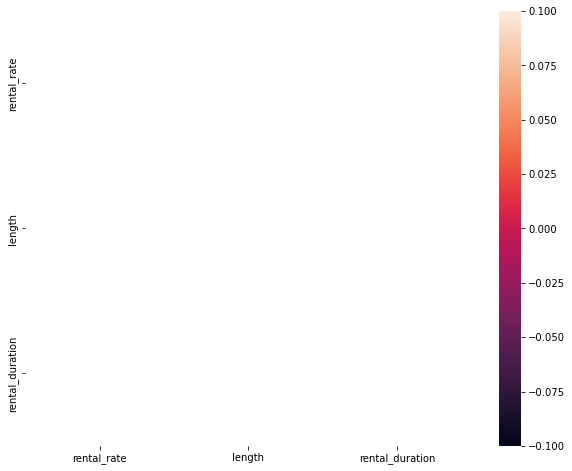

In [191]:
corr_matrix=data_may.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [172]:
#x-y-split:

y = data_st['rentals_may']
X = data_st.drop('rentals_may', axis=1)

In [192]:
#train-test-split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [193]:
#Num-cat-split
import numpy as np
X_num = data_may.select_dtypes(include = np.number)
X_cat = data_may.select_dtypes(include = object)

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(include = np.object)
X_test_cat  = X_test_df.select_dtypes(include = np.object)

C:\Users\Nadine Kleine\AppData\Local\Temp\ipykernel_3952\205887393.py:11: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_cat = X_train_df.select_dtypes(include = np.object)
C:\Users\Nadine Kleine\AppData\Local\Temp\ipykernel_3952\205887393.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat  = X_test_df.select_dtypes(include = np.object)


In [194]:
# Scaling numerical data
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num) 
X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
X_train_scaled.head()

,rental_rate,length,rental_duration
0,0.5,0.273381,0.50
1,0.0,0.741007,0.25
2,0.0,0.266187,1.00
3,1.0,0.223022,0.50
4,1.0,0.014388,0.00


In [195]:
X_train_scaled.shape

(1315, 3)

In [196]:
# encoding categorical data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
onehot_encoded = pd.DataFrame(encoded_cat, columns=cols)
onehot_encoded.head()

,title_ACE GOLDFINGER,title_ADAPTATION HOLES,title_AFFAIR PREJUDICE,title_AFRICAN EGG,title_AGENT TRUMAN,title_AIRPLANE SIERRA,title_AIRPORT POLLOCK,title_ALABAMA DEVIL,title_ALADDIN CALENDAR,title_ALAMO VIDEOTAPE,...,title_WYOMING STORM,title_YOUNG LANGUAGE,title_YOUTH KICK,title_ZHIVAGO CORE,title_ZOOLANDER FICTION,title_ZORRO ARK,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
#concat
X_train_treated = pd.concat([X_train_scaled, onehot_encoded], axis=1)

In [205]:
X_train_treated.shape

(1315, 885)

In [199]:
# Task 5: Create a logistic regression model to predict this variable from the cleaned data. 

In [200]:
# building the modell
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr')

classification.fit(X_train_treated, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [201]:
# apply scaler to X_test_num
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_scaled.head()

,rental_rate,length,rental_duration
0,1.0,0.985612,0.00
1,0.0,0.374101,0.00
2,1.0,0.417266,0.50
3,0.0,0.899281,0.00
4,0.0,0.115108,0.75


In [206]:
# apply encoded to X_test_cat 
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test = pd.DataFrame(encoded_test_cat, columns=cols)
onehot_encoded_test.head()


# I don't know what happened here?!? 

ValueError: Found unknown categories ['WAR NOTTING', 'EVOLUTION ALTER', 'OLEANDER CLUE', 'OPEN AFRICAN', 'WRATH MILE', 'SPLASH GUMP', 'MONTEZUMA COMMAND', 'KING EVOLUTION', 'VANISHED GARDEN', 'CONNECTION MICROCOSMOS', 'CARIBBEAN LIBERTY', 'CONSPIRACY SPIRIT', 'SPIRITED CASUALTIES', 'SPINAL ROCKY', 'BANG KWAI', 'ENCINO ELF', 'PANIC CLUB', 'HUNTER ALTER', 'PATHS CONTROL', 'YENTL IDAHO', 'MAKER GABLES', 'FUGITIVE MAGUIRE', 'MILE MULAN', 'IMPOSSIBLE PREJUDICE', 'EVE RESURRECTION', 'OUTBREAK DIVINE', 'BIRCH ANTITRUST', 'ALI FOREVER', 'STAMPEDE DISTURBING', 'TYCOON GATHERING', 'FRIDA SLIPPER', 'ARIZONA BANG', 'DIVINE RESURRECTION', 'LUCKY FLYING', 'OPERATION OPERATION', 'SHOCK CABIN', 'WORLD LEATHERNECKS', 'MONEY HAROLD', 'CIDER DESIRE', 'SPY MILE', 'STAR OPERATION', 'MASK PEACH', 'ANALYZE HOOSIERS', 'TERMINATOR CLUB', 'SIEGE MADRE', 'CALIFORNIA BIRDS', 'HYSTERICAL GRAIL', 'FLIGHT LIES', 'LOVERBOY ATTACKS', 'HONEY TIES', 'DOWNHILL ENOUGH', 'ELF MURDER', 'CROSSROADS CASUALTIES', 'DAUGHTER MADIGAN', 'QUEST MUSSOLINI', 'BRAVEHEART HUMAN', 'HUSTLER PARTY', 'FREEDOM CLEOPATRA', 'WISDOM WORKER', 'RACER EGG', 'JAWBREAKER BROOKLYN', 'GATHERING CALENDAR', 'GREEK EVERYONE', 'MOURNING PURPLE', 'FIRE WOLVES', 'CONNECTICUT TRAMP', 'INNOCENT USUAL', 'SMOOCHY CONTROL', 'FLINTSTONES HAPPINESS', 'VISION TORQUE', 'DUFFEL APOCALYPSE', 'ARMAGEDDON LOST', 'OZ LIAISONS', 'WIFE TURN', 'ROCK INSTINCT', 'BIRDCAGE CASPER', 'MOB DUFFEL', 'KICK SAVANNAH', 'CAT CONEHEADS'] in column 0 during transform

In [188]:
# combine scaled and onehot_encoded portions of X_test
X_test_treated = pd.concat([X_test_scaled, onehot_encoded_test], axis=1)

In [185]:
predictions = classification.predict(X_test_treated)
predictions 
classification.score(X_test_treated, y_test) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- title_ACE GOLDFINGER
- title_ADAPTATION HOLES
- title_AFFAIR PREJUDICE
- title_AFRICAN EGG
- title_AGENT TRUMAN
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 7 features, but LogisticRegression is expecting 885 features as input.

In [ ]:
# Task 6: Evaluate the results.

In [ ]:
# As soon as I found a solution for the error by applying encoded to X_test_cat, I can tell you if my model works!